<center><font size=6> Bank Churn Prediction </font></center>

## Problem Statement

### Context

Businesses like banks which provide service have to worry about problem of 'Customer Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on improvement of service, keeping in mind these priorities.

### Objective

You as a Data scientist with the  bank need to  build a neural network based classifier that can determine whether a customer will leave the bank  or not in the next 6 months.

### Data Dictionary

* CustomerId: Unique ID which is assigned to each customer

* Surname: Last name of the customer

* CreditScore: It defines the credit history of the customer.
  
* Geography: A customer’s location
   
* Gender: It defines the Gender of the customer
   
* Age: Age of the customer
    
* Tenure: Number of years for which the customer has been with the bank

* NumOfProducts: refers to the number of products that a customer has purchased through the bank.

* Balance: Account balance

* HasCrCard: It is a categorical variable which decides whether the customer has credit card or not.

* EstimatedSalary: Estimated salary

* isActiveMember: Is is a categorical variable which decides whether the customer is active member of the bank or not ( Active member in the sense, using bank products regularly, making transactions etc )

* Exited : whether or not the customer left the bank within six month. It can take two values
** 0=No ( Customer did not leave the bank )
** 1=Yes ( Customer left the bank )

In [78]:
#Install necessary libraries
#!pip install tensorflow==2.15.0 scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==2.0.3 imbalanced-learn==0.10.1 -q --user

## Importing necessary libraries

In [79]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Library to split data
from sklearn.model_selection import train_test_split

# library to import to standardize the data
from sklearn.preprocessing import StandardScaler, LabelEncoder

# importing different functions to build models
import tensorflow as tf
from tensorflow import keras
from keras import backend
from keras.models import Sequential
from keras.layers import Dense, Dropout

# importing SMOTE
from imblearn.over_sampling import SMOTE

# importing metrics
from sklearn.metrics import confusion_matrix,roc_curve,classification_report,recall_score

import random

# Library to avoid the warnings
import warnings
warnings.filterwarnings("ignore")

## Loading the dataset

In [80]:
from google.colab import drive
drive.mount('/content/drive')
# load the data file
data = pd.read_csv('/content/drive/MyDrive/PGP-AIML/neuralnetworks/project/bank-1.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Data Overview

In [81]:
#Load first 5 rows
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [82]:
#Load last 5 rows
data.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [83]:
# Checking the number of rows and columns in the training data
data.shape

(10000, 14)

There are 10000 rows and 14 columns in the dataset

In [84]:
### Check the data types of the columns for the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


* There are 14 data columns in the dataset (2 float type, 9 int type, and 3 object type).
* There are no missing values in the data.




In [85]:
### Checking the Statistical Summary
data.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


In [86]:
### Checking for Missing Values
data.isnull().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


In [87]:
### Checking for unique values for each of the column
data.nunique()

,0
RowNumber,10000
CustomerId,10000
Surname,2932
CreditScore,460
Geography,3
Gender,2
Age,70
Tenure,11
Balance,6382
NumOfProducts,4


In [88]:
#RowNumber , CustomerId and Surname are unique hence dropping it
data = data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

## Exploratory Data Analysis

### Univariate Analysis

In [89]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [90]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

### Observations on CreditScore

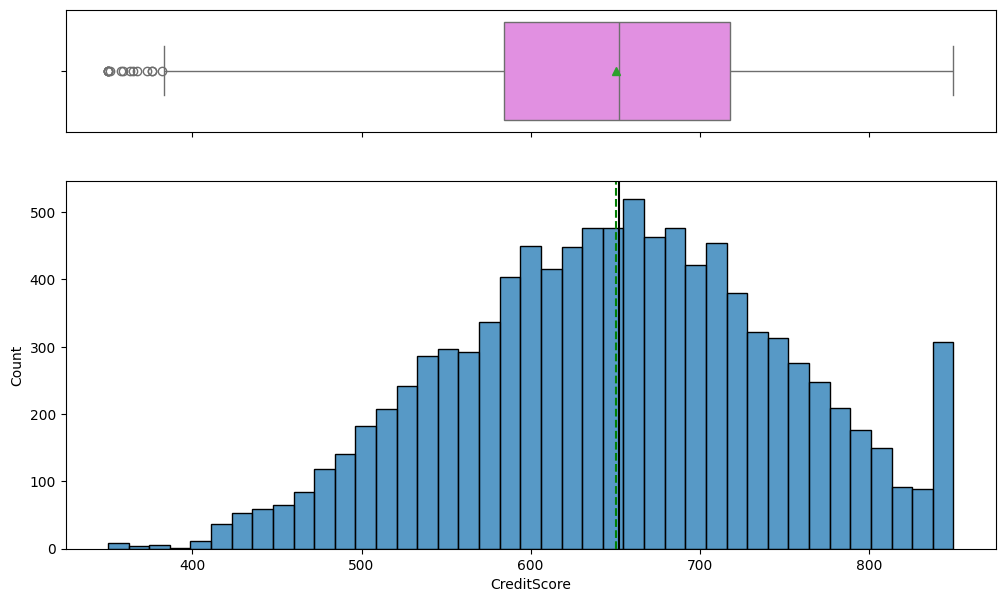

In [91]:
histogram_boxplot(data,'CreditScore')

* Observations:
  * The majority of credit scores are in the range of 600 to 750.
  * There are some lower outliers (credit scores below 400).
  * There is a small but notable peak around 850, indicating a group of individuals with excellent credit scores.
  * The dataset appears slightly skewed with a heavier tail on the lower end.

### Observations on Age

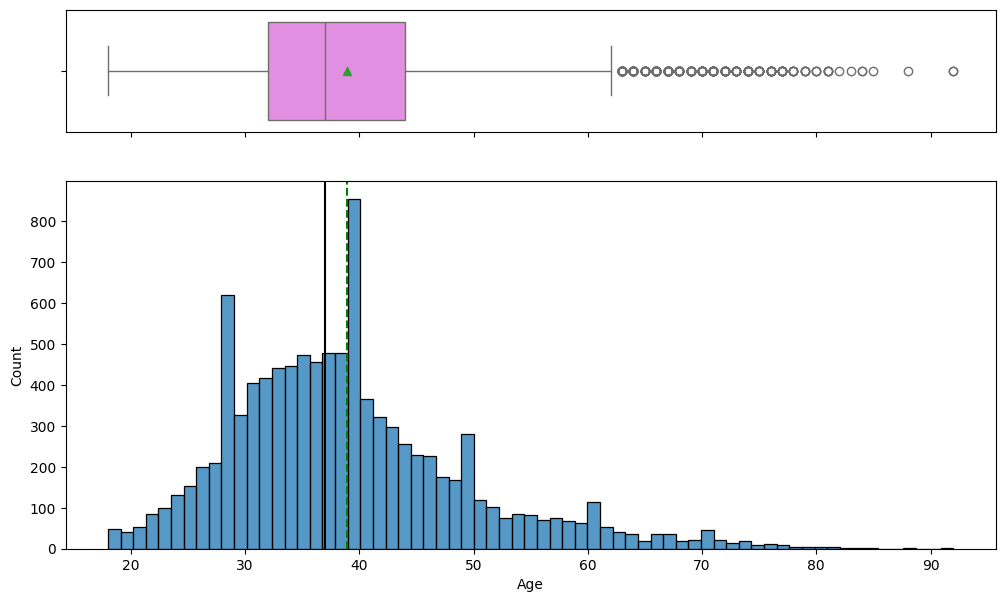

In [92]:
histogram_boxplot(data,'Age')

* Observations:
  * The majority of individuals are between 25-50 years old.
  * There is a significant number of older outliers, indicating some people in their 60s, 70s, 80s, and 90s.
  * The dataset exhibits a right-skewed distribution, with fewer people at very young and very old ages.
  * A notable peak exists at 40 years old, potentially representing a large demographic group.

### Observations on Balance

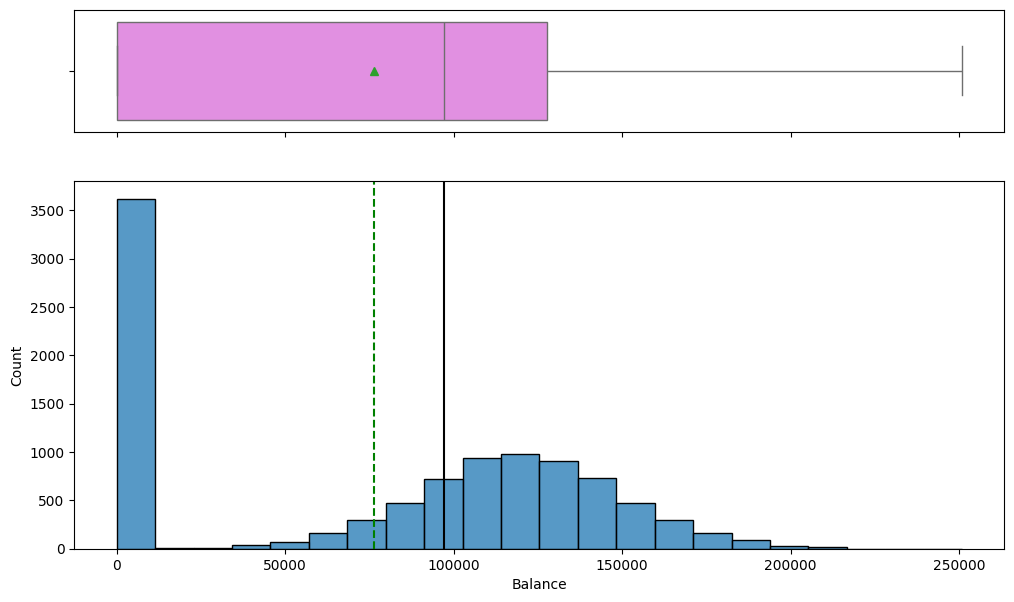

In [93]:
histogram_boxplot(data,'Balance')

* Observations:
  * The balance distribution is right-skewed, with a large peak at zero balance and a smaller spread over a higher range of balances.
  * A large number of individuals (~3500) have a zero balance, which could indicate inactive accounts or specific financial behavior.
  * The remaining balance values are spread out, mostly between 50,000 and 150,000, with the median in the upper range, suggesting a wealthier subset.
  * The boxplot shows a long right whisker, suggesting the presence of high-value outliers, with some balances extending close to 250,000.

### Observations on Estimated Salary

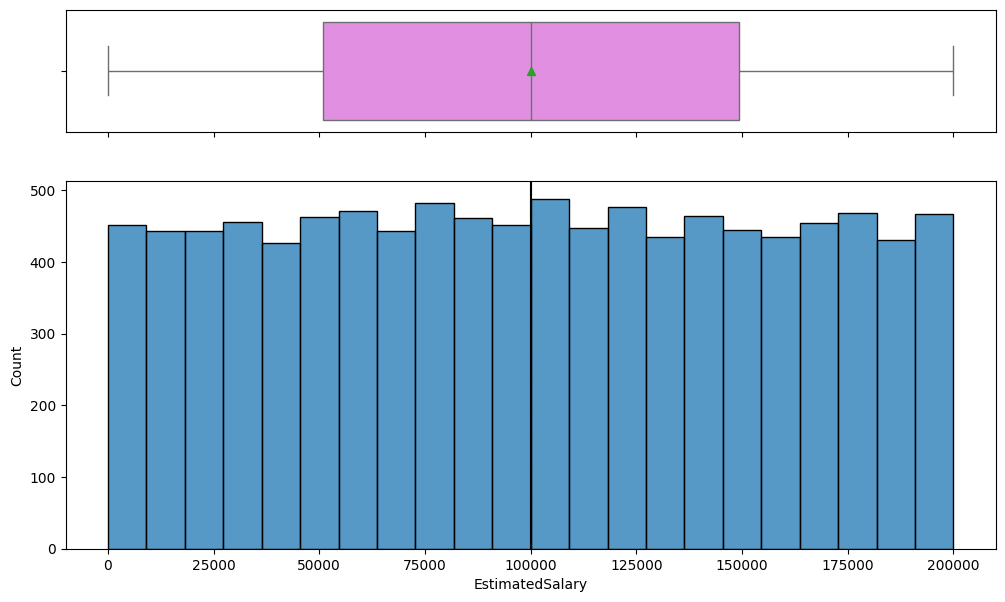

In [94]:
histogram_boxplot(data,'EstimatedSalary')

* Observations:
  * The histogram shows a nearly uniform distribution, indicating that estimated salaries are evenly distributed across the entire range from 0 to 200,000.
  * The boxplot does not show any major outliers, suggesting that salaries are well-distributed without extreme deviations.
  * The median (center of the box) and mean (green triangle) appear to be around 100,000, indicating a balanced salary distribution.
  * The histogram bins have similar heights, meaning individuals are evenly spread across different salary levels, without any significant peaks or dips.

### Observations on Exited

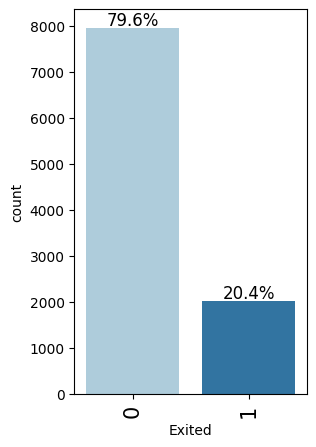

In [95]:
labeled_barplot(data, "Exited", perc=True)

* Observations:
  * The majority of customers (79.6%) have not exited while only 20.4% have exited.
  * Only about 1 in 5 customers have left, indicating that most customers remain with the company.
  * While the churn rate is not extremely high, 20.4% is still significant, suggesting there could be underlying issues causing customers to leave.

### Observations on Geography

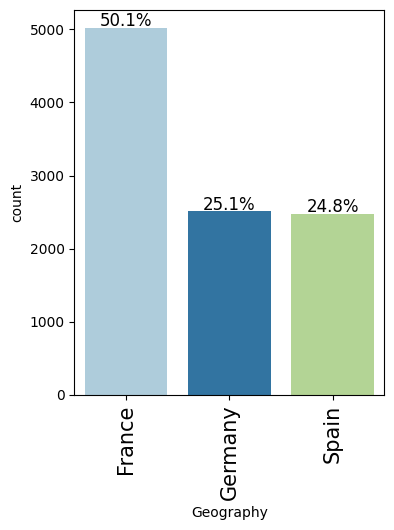

In [96]:
labeled_barplot(data,'Geography',perc=True)

* Observations:
  * 50.1% of customers are from France, making it the largest customer group in the dataset.
  * Germany (25.1%) and Spain (24.8%) have nearly equal customer distributions, each contributing about a quarter of the total.
  * Since France has the largest share, any trends or insights derived from the data might be influenced more by French customers.
  * If analyzing customer churn, spending habits, or product engagement, it may be beneficial to examine regional differences.
  * The company might want to consider region-specific marketing or customer retention strategies, especially if there are differences in churn rates between these regions.

### Observations on Gender

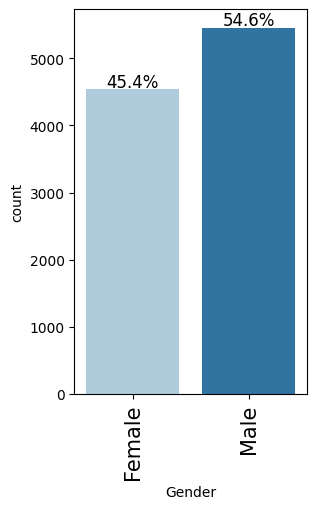

In [97]:
labeled_barplot(data,'Gender',perc=True)

* Observations:
  * 54.6% of customers are male, while 45.4% are female.
  * The dataset shows a small gender imbalance, with males making up a slightly larger proportion.
  * The company could explore if product offerings or customer service resonate differently with male and female customers and tailor strategies accordingly.

### Observations on Tenure

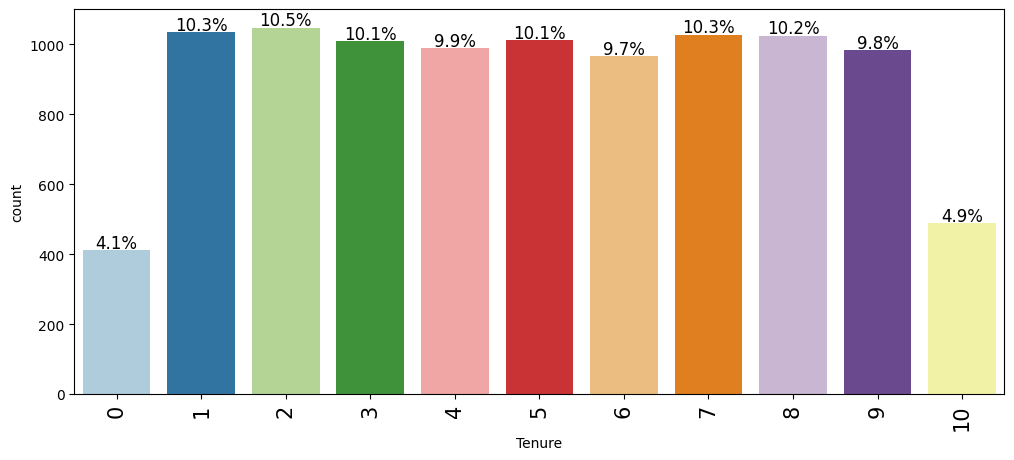

In [98]:
labeled_barplot(data,'Tenure',perc=True)

* Observations:
  * The majority of tenure values (from 1 to 9 years) have a fairly uniform distribution, each representing around 9.7% to 10.5% of the total customer base.
  * Tenure 0, represeing new customers, has the lowest percentage (4.1%), suggesting fewer new customers added.
  * Tenure 10 also has a relatively lower count (4.9%), possibly indicating a drop in long-term retention.
  * The lower count at tenure 0 and 10 may indicate that customer retention is challenging at the very start and after 10 years, suggesting onboarding and long-term engagement issues.
  * The stable distribution from tenure 1 to 9 years suggests a steady customer base with no major drop-offs in mid-range tenures.

### Observations on Number of Products

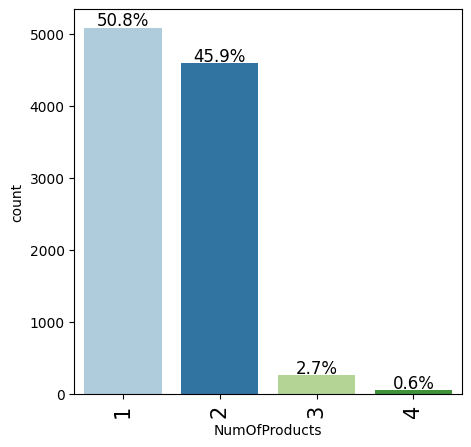

In [99]:
labeled_barplot(data,'NumOfProducts',perc=True)

* Observations:
  * 50.8% of customers have 1 product, while 45.9% have 2 products. This means that over 96% of customers have either one or two products, showing a strong preference for a limited number of financial products.
  * Only 2.7% of customers have 3 products, and a mere 0.6% have 4 products. This suggests that very few customers opt for multiple financial products, possibly due to lack of interest, affordability, or product limitations.
  * Since most customers have only 1 or 2 products, there could be an opportunity to increase product adoption by offering personalized promotions, discounts, or bundling options to encourage them to use more services.
  * If the churn rate among customers with 3 or 4 products is high, it could indicate dissatisfaction with multiple products or difficulty in managing them.

### Observations on Has Credit Card

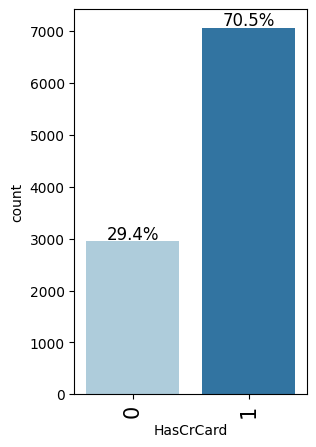

In [100]:
labeled_barplot(data,'HasCrCard',perc=True)

* Observations:
  * 70.5% of customers own a credit card, indicating that credit card usage is common among the customer base.
  * 29.4% of customers do not have a credit card, which could be due to:
    * Preference for debit cards or cash transactions.
    * Lack of eligibility or interest in credit cards.
    * Financial policies restricting access to credit.
  * Given that nearly 30% of customers do not have a credit card, there is a potential opportunity to market credit card products to this segment through tailored offers, incentives, or pre-approved options.

### Observations on Is Active Member

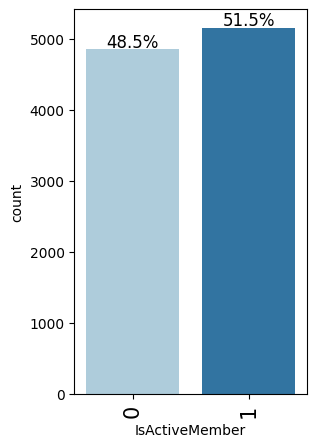

In [101]:
labeled_barplot(data,'IsActiveMember',perc=True)

* Observations:
  * 51.5% of customers are active members (IsActiveMember = 1).
  * 48.5% of customers are inactive (IsActiveMember = 0).
  * This indicates that the customer base is evenly split between active and inactive users.

### Bivariate Analysis

In [102]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left",
        frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

### Correlation plot

In [103]:
# defining the list of numerical columns
num_cols_list = ["CreditScore","Age","Tenure","Balance","EstimatedSalary"]

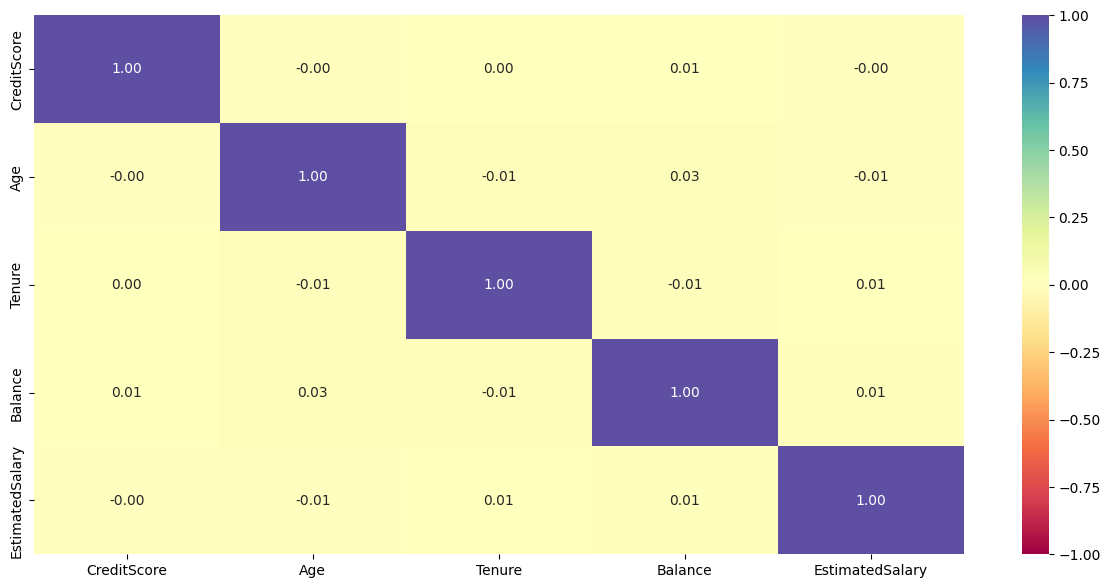

In [104]:
plt.figure(figsize=(15, 7))
sns.heatmap(data[num_cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

* Observations:
  * The correlation values between all numerical variables are very close to 0, indicating that there is no strong linear relationship between them.
  * Since the correlations are all near zero, it suggests that these features are largely independent and do not influence each other directly.
  * The highest correlation observed is 0.03 between Age and Balance, which is still extremely weak and not statistically significant.
  * Since there are no highly correlated variables, it suggests that these features provide independent information and could be useful in a machine learning model without multicollinearity concerns.


### Exited Vs Geography

Exited        0     1    All
Geography                   
All        7963  2037  10000
Germany    1695   814   2509
France     4204   810   5014
Spain      2064   413   2477
------------------------------------------------------------------------------------------------------------------------


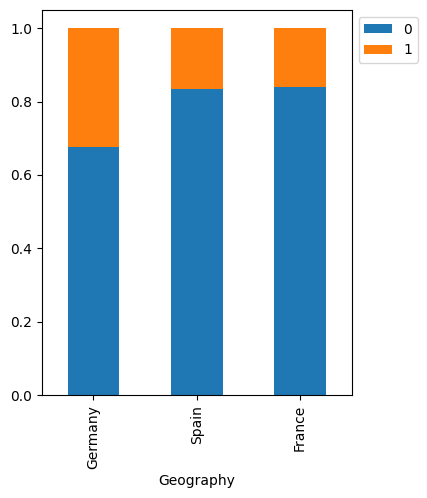

In [105]:
stacked_barplot(data, "Geography", "Exited" )

* Observations:
  * Germany Has the Highest Churn Rate
    * The proportion of churned customers (orange section) is largest in Germany, indicating that German customers are more likely to leave compared to those in Spain and France.

  * France and Spain Have Lower Churn Rates
    * Both France and Spain have similar churn rates, with a larger proportion of retained customers (blue section) compared to Germany.
    * This suggests that customers in these two countries may have higher satisfaction or engagement levels.

  * Possible Regional Differences in Customer Behavior
    * The higher churn in Germany could be due to specific market conditions, competitive banking alternatives, or dissatisfaction with services.
    * Further analysis is needed to determine if factors like income, credit score, or product offerings differ significantly across regions.

  * Need for Country-Specific Retention Strategies
    * Since churn varies by geography, a one-size-fits-all approach may not be effective.
    * The company could focus on Germany-specific retention strategies, such as better customer service, improved financial products, or loyalty incentives.

### Exited Vs Gender

### Exited Vs Has Credit Card

Exited        0     1    All
HasCrCard                   
All        7963  2037  10000
1          5631  1424   7055
0          2332   613   2945
------------------------------------------------------------------------------------------------------------------------


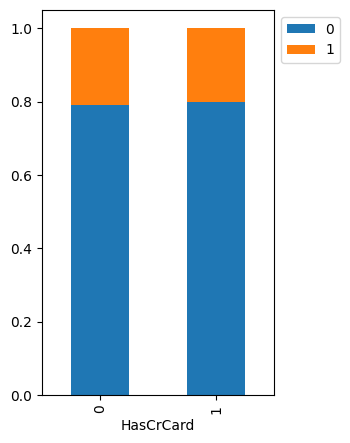

In [106]:
stacked_barplot(data, "HasCrCard", "Exited")

* Observations:
  * The proportion of churned customers (orange section) is similar for both groups (those with and without a credit card).
  * This indicates that having a credit card does not significantly influence churn rates.

### Exited Vs Is active member

IsActiveMember     0     1    All
HasCrCard                        
All             4849  5151  10000
1               3448  3607   7055
0               1401  1544   2945
------------------------------------------------------------------------------------------------------------------------


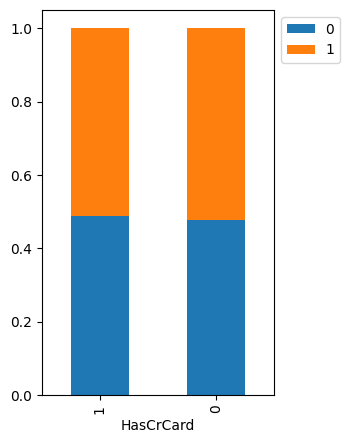

In [107]:
stacked_barplot(data, "HasCrCard", "IsActiveMember")

* Observations:
  * The orange section (churned customers) makes up a large proportion in both groups, suggesting a generally high churn rate overall.
  * The proportions of churn (HasCrCard = 1 and HasCrCard = 0) appear nearly identical, indicating that credit card ownership does not significantly impact churn.
  * Since both groups exhibit a similar churn trend, other factors (e.g., account balance, tenure, number of products, or income level) might be more influential in predicting churn.

### Exited Vs Credit Score

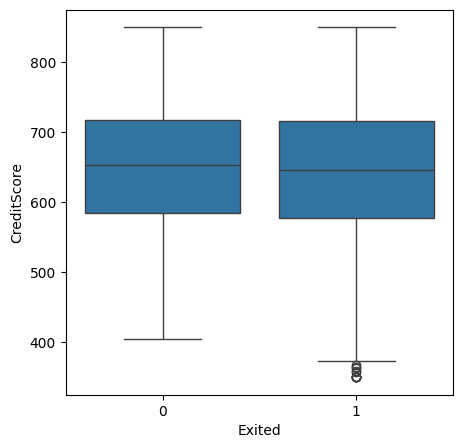

In [108]:
plt.figure(figsize=(5,5))
sns.boxplot(y='CreditScore',x='Exited',data=data)
plt.show()

* Observations:
  * The median credit score is nearly identical for both retained (Exited = 0) and churned (Exited = 1) customers. This suggests that credit score alone is not a strong indicator of churn.
  * The churned group (Exited = 1) has more outliers at the lower end (~350-400 credit score range). This could indicate that customers with very low credit scores are slightly more prone to churn, though the overall impact is minimal.

### Exited Vs Age

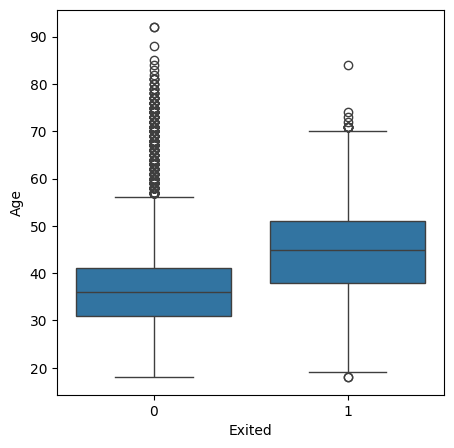

In [109]:
plt.figure(figsize=(5,5))
sns.boxplot(y='Age',x='Exited',data=data)
plt.show()

* Observations:
  * The median age of churned customers is significantly higher than that of retained customers. This indicates that older customers are more likely to leave, suggesting that age plays a significant role in churn behavior.
  * The retained customers (Exited = 0) have a lower median age and a concentration of younger individuals. This suggests that younger customers may be more engaged with the bank's services or less likely to switch financial institutions.
  * The age distribution of churned customers is more spread out, with a higher upper quartile and some outliers in the 80+ age range. This implies that both middle-aged and older customers are more prone to churn.

### Exited Vs Tenure

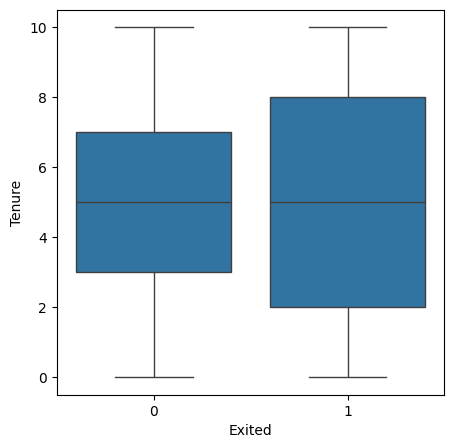

In [110]:
plt.figure(figsize=(5,5))
sns.boxplot(y='Tenure',x='Exited',data=data)
plt.show()

* Observations:
  * The median tenure for both retained (Exited = 0) and churned (Exited = 1) customers appears almost identical, indicating that tenure alone is not a strong predictor of churn.
  * The churned customers (Exited = 1) have a slightly wider interquartile range (IQR), suggesting that some long-tenured customers are leaving at a higher rate. However, since both groups have similar median tenure, the difference is not highly significant.
  

### Exited Vs Balance

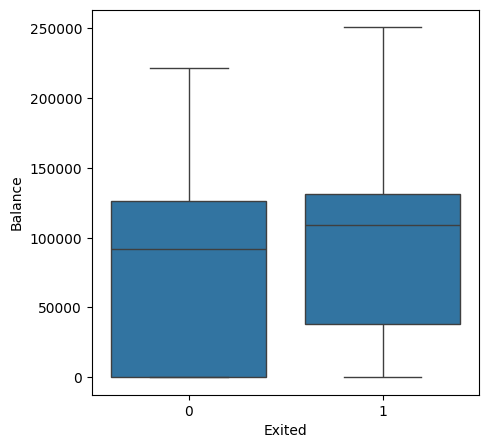

In [111]:
plt.figure(figsize=(5,5))
sns.boxplot(y='Balance',x='Exited',data=data)
plt.show()

* Observations:
  * The median balance for churned customers (Exited = 1) is higher than that of retained customers (Exited = 0). This suggests that customers with higher account balances are more likely to leave, which may indicate dissatisfaction despite having significant funds.    
  * The interquartile range (IQR) is quite wide for both groups, meaning that customers with both low and high balances are present in both categories. However, the churned group has a slightly higher concentration of high-balance customers.

### Exited Vs Number of Products

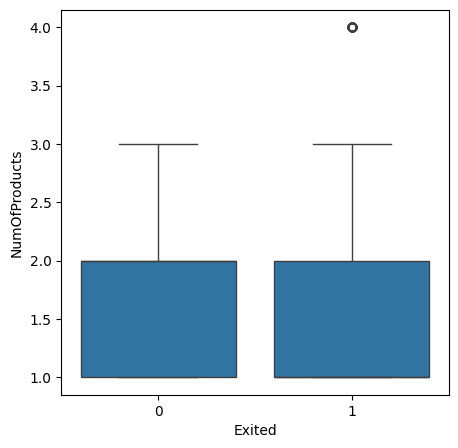

In [112]:
plt.figure(figsize=(5,5))
sns.boxplot(y='NumOfProducts',x='Exited',data=data)
plt.show()

* Observations:
  * The median number of products is identical for both churned (Exited = 1) and retained (Exited = 0) customers. This suggests that the number of products alone does not strongly influence churn.

### Exited Vs Estimated Salary

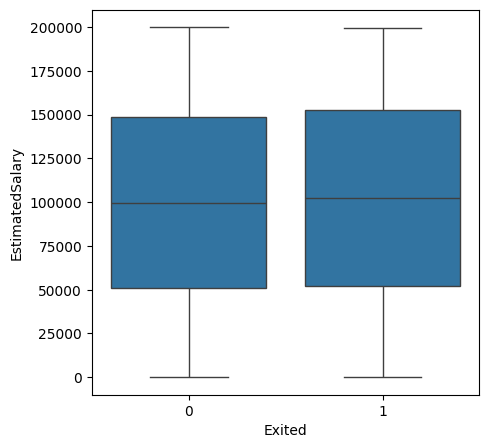

In [113]:
plt.figure(figsize=(5,5))
sns.boxplot(y='EstimatedSalary',x='Exited',data=data)
plt.show()

* Observations:
  * The median estimated salary is almost identical for both churned (Exited = 1) and retained (Exited = 0) customers. This indicates that salary does not have a strong direct impact on churn behavior.

## Data Preprocessing

### Dummy Variable Creation

In [114]:
data = pd.get_dummies(data,columns=data.select_dtypes(include=["object"]).columns.tolist(),drop_first=True)
data = data.astype(float)
data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619.0,42.0,2.0,0.00,1.0,1.0,1.0,101348.88,1.0,0.0,0.0,0.0
1,608.0,41.0,1.0,83807.86,1.0,0.0,1.0,112542.58,0.0,0.0,1.0,0.0
2,502.0,42.0,8.0,159660.80,3.0,1.0,0.0,113931.57,1.0,0.0,0.0,0.0
3,699.0,39.0,1.0,0.00,2.0,0.0,0.0,93826.63,0.0,0.0,0.0,0.0
4,850.0,43.0,2.0,125510.82,1.0,1.0,1.0,79084.10,0.0,0.0,1.0,0.0


### Train-validation-test Split

In [115]:
### Define and X and y for the train and test split
X = data.drop(['Exited'],axis=1)
y = data['Exited']

In [116]:
# Splitting the dataset into the 80% Training and 20% Testing set.
X_large, X_test, y_large, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42,stratify=y,shuffle = True)

In [117]:
# Splitting the dataset into the Training and Testing set.

X_train, X_val, y_train, y_val = train_test_split(X_large, y_large, test_size = 0.2, random_state = 42,stratify=y_large, shuffle = True)

In [118]:
# Print the shapes of the train, validation, and test datasets
print(X_train.shape, X_val.shape, X_test.shape)
print(y_train.shape, y_val.shape, y_test.shape)

(6400, 11) (1600, 11) (2000, 11)
(6400,) (1600,) (2000,)


### Data Normalization

### Since all the numerical values are on a different scale, so we will be scaling all the numerical values to bring them to the same scale.

In [119]:
sc = StandardScaler()

X_train[num_cols_list] = sc.fit_transform(X_train[num_cols_list])
X_val[num_cols_list] = sc.transform(X_val[num_cols_list])
X_test[num_cols_list] = sc.transform(X_test[num_cols_list])

## Model Building

### Model Evaluation Criterion

Write down the logic for choosing the metric that would be the best metric for this business scenario.


In [120]:
# Define a function for plotting the confusion matrix
def make_confusion_matrix(actual_targets, predicted_targets):
    """
    To plot the confusion_matrix with percentages

    actual_targets: actual target (dependent) variable values
    predicted_targets: predicted target (dependent) variable values
    """
    cm = confusion_matrix(actual_targets, predicted_targets)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(cm.shape[0], cm.shape[1])

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [121]:
# create two blank dataframes that will store the recall values for all the models we build.
train_metric_df = pd.DataFrame(columns=["recall"])
valid_metric_df = pd.DataFrame(columns=["recall"])

In [122]:
# defining the batch size and # epochs upfront as we'll be using the same values for all models
epochs = 25
batch_size = 64

### Neural Network with SGD Optimizer

In [123]:
backend.clear_session()
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [124]:
#Initializing the neural network
model_0 = Sequential()
# Adding the input layer with 64 neurons and relu as activation function with number of columns from X_train
model_0.add(Dense(64, activation='relu', input_dim = X_train.shape[1]))
# Add a hidden layer with 32 neurons
model_0.add(Dense(32, activation='relu'))
# Add output layer, use sigmoid
model_0.add(Dense(1, activation = 'sigmoid'))

## Model Performance Improvement

### Neural Network with Adam Optimizer

In [125]:
# defining SGD as the optimizer to be used
optimizer = tf.keras.optimizers.SGD()
model_0.compile(loss='binary_crossentropy', optimizer=optimizer)
model_0.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,881 (11.25 KB)

 Trainable params: 2,881 (11.25 KB)

 Non-trainable params: 0 (0.00 B)

* Observations:
  * The model consists of only three dense (fully connected) layers, making it a relatively lightweight and computationally efficient architecture.
With a total of 2,881 parameters, it is small in size and suitable for quick training and deployment.
  * First Dense Layer - This layer has 64 neurons, and given the parameter count, it likely receives input features from a dataset with 12 input features (since 12 * 64 + 64 = 768).
  * Secong Dense Layer - This hidden layer reduces the dimensionality and introduces non-linearity for feature extraction.
  * Output Layer - A single neuron with a sigmoid activation function, making it suited for binary classification tasks (e.g., predicting churn).
  * Since there are no non-trainable parameters, all 2,881 parameters are updated during training, allowing full flexibility in learning patterns from the data.


  * Given the small number of parameters and small dataset the model may overfit and for large/complex dataset it might be underfitting.
  * To improve performance, techniques like adding more hidden layers, increasing neuron counts, or using regularization (dropout, batch normalization) could be explored.

In [126]:
# Fitting the ANN
import time
start = time.time()
history_0 = model_0.fit(
    X_train, y_train,
    batch_size=batch_size,
    validation_data=(X_val,y_val),
    epochs=epochs,    ## Complete the code to specify the number of epochs
    verbose=1
)
end=time.time()

Epoch 1/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.5880 - val_loss: 0.5030
Epoch 2/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.5029 - val_loss: 0.4834
Epoch 3/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4842 - val_loss: 0.4712
Epoch 4/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4707 - val_loss: 0.4621
Epoch 5/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4601 - val_loss: 0.4551
Epoch 6/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4518 - val_loss: 0.4496
Epoch 7/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4452 - val_loss: 0.4454
Epoch 8/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4400 - val_loss: 0.4422
Epoch 9/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4357 - val_loss: 0.4398
Epoch 10/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4323 - val_loss: 0.4379
Epoch 11/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4294 - val_loss: 0.4363
Epoch 12/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

#### Loss Function

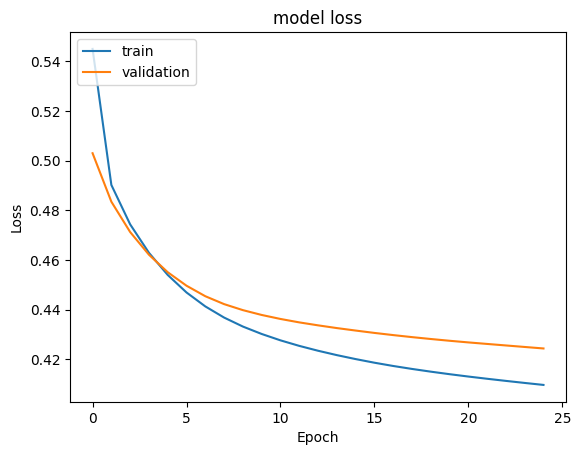

In [127]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_0.history['loss'])
plt.plot(history_0.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

* Observations:
  *     Both the training loss (blue line) and validation loss (orange line) are decreasing over epochs, indicating that the model is learning and improving.
  * The validation loss is higher than the training loss, which suggests some level of overfitting. However, the gap is not too large, meaning the model still generalizes reasonably well to unseen data.
  * If the gap between training and validation loss were increasing sharply, it would indicate severe overfitting, but here it remains relatively small and stable.
  * Since the validation loss is still decreasing, additional epochs might further improve performance.
  * Fine-tuning learning rate, batch size, or network architecture could also optimize the model.

In [128]:
#Predicting the results using best as a threshold
y_train_pred = model_0.predict(X_train)
y_train_pred = (y_train_pred > 0.5)
y_train_pred

200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [129]:
#Predicting the results using best as a threshold
y_val_pred = model_0.predict(X_val)
y_val_pred = (y_val_pred > 0.5)
y_val_pred

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [130]:
model_name = "NN with SGD"

train_metric_df.loc[model_name] = recall_score(y_train, y_train_pred)
valid_metric_df.loc[model_name] = recall_score(y_val, y_val_pred)

#### Classification report

In [131]:
#classification report for train data
cr = classification_report(y_train, y_train_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.83      0.97      0.90      5096
         1.0       0.68      0.24      0.36      1304

    accuracy                           0.82      6400
   macro avg       0.76      0.61      0.63      6400
weighted avg       0.80      0.82      0.79      6400



* Observations:
  * The model achieves an accuracy of 82% on training data, meaning it correctly predicts customer churn status in most cases.
  * Precision (83%) and recall (97%) for class 0 (Non-Churned Customers) are high, indicating that the model is very effective at identifying customers who will stay.
  * The high recall (97%) means the model correctly classifies almost all non-churned customers.
  * Precision for churned customers (68%) is decent, but recall (24%) is very low. This means that while the model is correct when it predicts a customer will churn, it misses a large number of actual churners, which is problematic for churn prediction.
  * The macro average F1-score (63%) is much lower than the weighted average (79%), indicating a strong imbalance in model performance across classes.
  * The model is biased toward predicting non-churned customers (class 0), likely due to the class imbalance in the dataset.

In [132]:
#lassification report for validation
cr = classification_report(y_val, y_val_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.83      0.97      0.89      1274
         1.0       0.66      0.20      0.31       326

    accuracy                           0.82      1600
   macro avg       0.74      0.59      0.60      1600
weighted avg       0.79      0.82      0.77      1600



* Observations on validation data:
  * The model achieves an accuracy of 82%, meaning it correctly classifies most instances.
  * Precision (83%) and recall (97%) for class 0 (Non-Churned Customers) are high, indicating the model effectively identifies customers who will stay.
  * The high recall (97%) means the model rarely misclassifies non-churners as churners.
  * Precision for churners (66%) is decent, meaning when the model predicts churn, it is correct 66% of the time. However, recall for churners (20%) is very low, meaning the model fails to identify 80% of actual churned customers, which is a major issue for churn prediction.


#### Confusion matrix

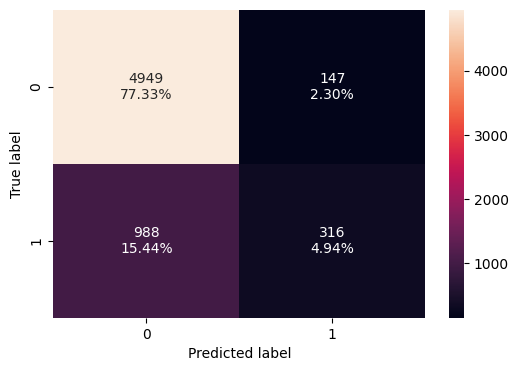

In [133]:
make_confusion_matrix(y_train, y_train_pred)

* Observations:
  * The model correctly classifies 77.33% of non-churners (True Negatives: 4949/6400).
  * Only 2.30% of non-churners were misclassified as churners (False Positives: 147/6400), meaning the model is very precise in identifying customers who will stay.
  * The model only correctly predicts 4.94% of churned customers (True Positives: 316/6400), meaning it misses a significant portion of actual churners.
  * 15.44% of churners were incorrectly classified as non-churners (False Negatives: 988/6400), which indicates a major weakness in recall for churned customers.
  * The model is highly skewed towards predicting non-churn (class 0) due to the class imbalance. While this leads to high accuracy, it fails to capture the important minority class (churners), which is crucial for business decision-making.

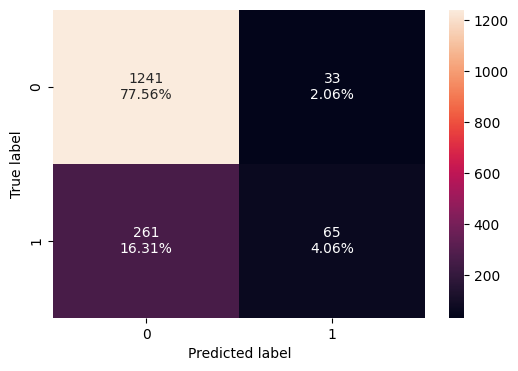

In [134]:
make_confusion_matrix(y_val, y_val_pred)

* Observations:
  * The model correctly predicts 77.56% of non-churned customers (True Negatives: 1241/1600).
  * Only 2.06% of non-churners were misclassified as churners (False Positives: 33/1600), indicating high precision for predicting customers who will stay.
  * The model only correctly predicts 4.06% of actual churners (True Positives: 65/1600), meaning it fails to capture most customers who actually churn.
  * 16.31% of churned customers were incorrectly classified as non-churners (False Negatives: 261/1600), showing a significant failure to identify actual churn cases.
  * The model is heavily biased towards predicting non-churners, resulting in a large number of false negatives (missed churners). While the overall accuracy may seem reasonable, it is misleading because the model is not effective in predicting the minority churn class.

## Model Performance Improvement

### Neural Network with Adam Optimizer

In [135]:
backend.clear_session()
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [136]:
#Initializing the neural network
model_1 = Sequential()
model_1.add(Dense(14,activation="relu",input_dim=X_train.shape[1]))
model_1.add(Dense(7,activation="relu"))
model_1.add(Dense(1,activation="sigmoid"))

In [137]:
model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 14)                  │             168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │             105 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               8 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 281 (1.10 KB)

 Trainable params: 281 (1.10 KB)

 Non-trainable params: 0 (0.00 B)

In [138]:
# defining Adam as the optimizer to be used
optimizer = tf.keras.optimizers.Adam()
model_1.compile(loss='binary_crossentropy', optimizer=optimizer)

In [139]:
start = time.time()
history_1 = model_1.fit(X_train, y_train, validation_data=(X_val,y_val) , batch_size=batch_size, epochs=epochs)
end=time.time()

Epoch 1/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.7175 - val_loss: 0.5078
Epoch 2/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.4999 - val_loss: 0.4588
Epoch 3/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.4654 - val_loss: 0.4480
Epoch 4/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4517 - val_loss: 0.4410
Epoch 5/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4423 - val_loss: 0.4356
Epoch 6/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4353 - val_loss: 0.4314
Epoch 7/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4301 - val_loss: 0.4283
Epoch 8/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4256 - val_loss: 0.4259
Epoch 9/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4213 - val_loss: 0.4238
Epoch 10/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4172 - val_loss: 0.4214
Epoch 11/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4134 - val_loss: 0.4192
Epoch 12/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

In [140]:
print("Time taken in seconds ",end-start)

Time taken in seconds  11.88160753250122


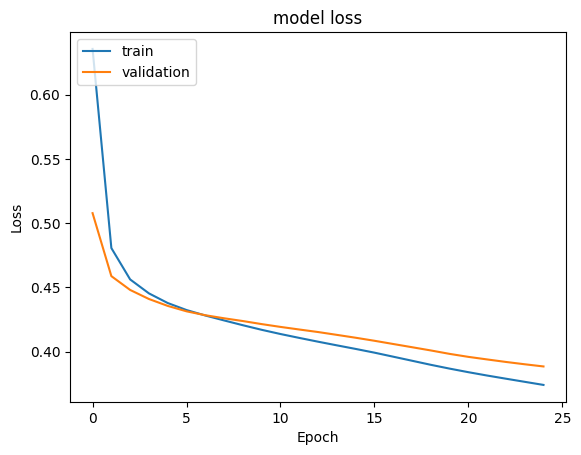

In [141]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_1.history['loss'])
plt.plot(history_1.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

* Observations:
  * Both training loss (blue line) and validation loss (orange line) are steadily decreasing over epochs. This indicates that the model is continuing to learn and improve without signs of stagnation or major overfitting.
  * The gap between training and validation loss is small, suggesting that the model is generalizing well to unseen data.
  * Since both losses are still decreasing, additional training epochs may further improve performance.

In [142]:
#Predicting the results using 0.5 as the threshold
y_train_pred = model_1.predict(X_train)
y_train_pred = (y_train_pred > 0.5)
y_train_pred

200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [143]:
#Predicting the results using 0.5 as the threshold
y_val_pred = model_1.predict(X_val)
y_val_pred = (y_val_pred > 0.5)
y_val_pred

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [144]:
model_name = "NN with Adam"

train_metric_df.loc[model_name] = recall_score(y_train,y_train_pred)
valid_metric_df.loc[model_name] = recall_score(y_val,y_val_pred)

#### Classification report

In [145]:
#classification report
cr=classification_report(y_train,y_train_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.86      0.96      0.91      5096
         1.0       0.71      0.40      0.51      1304

    accuracy                           0.85      6400
   macro avg       0.79      0.68      0.71      6400
weighted avg       0.83      0.85      0.83      6400



In [146]:
#classification report
cr=classification_report(y_val,y_val_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.85      0.96      0.91      1274
         1.0       0.72      0.35      0.47       326

    accuracy                           0.84      1600
   macro avg       0.78      0.66      0.69      1600
weighted avg       0.82      0.84      0.82      1600



#### Confusion matrix

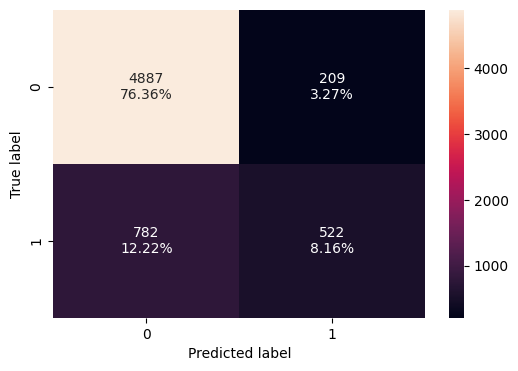

In [147]:
make_confusion_matrix(y_train, y_train_pred)

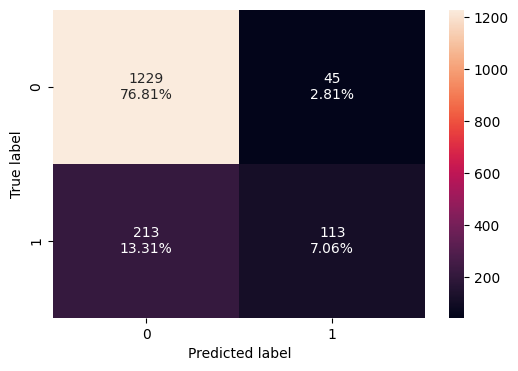

In [148]:
make_confusion_matrix(y_val, y_val_pred)

* Observations:
  * Similar Performance on Training and Validation Data
    * The model shows consistent performance between training and validation datasets, indicating no significant overfitting.
    * The percentage distributions for True Positives (TP), True Negatives (TN), False Positives (FP), and False Negatives (FN) are similar in both datasets.
  * High Accuracy for Non-Churners (Class 0)
    * The model correctly classifies around 76% of non-churned customers in both training and validation datasets.
    * False positives (misclassifying non-churners as churners) remain low (around 3% in both cases), indicating good precision for class 0.
  * Moderate Recall for Churned Customers (Class 1)
    * The recall for churned customers (TP / Actual Churn) is around 8-9% in both datasets, meaning the model still struggles to detect churners effectively.
    * The false negative rate (misclassifying churners as non-churners) is still relatively high (11-12% of total cases), meaning that the model fails to capture a significant portion of actual churners.
  * Validation performance closely matches training performance, the model is not overfitting but might be underfitting for churn prediction.
  

### Neural Network with Adam Optimizer and Dropout

In [149]:
backend.clear_session()
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [150]:
#Initializing the neural network
model_2 = Sequential()
model_2.add(Dense(14,activation="relu",input_dim=X_train.shape[1]))
model_2.add(Dropout(0.4))
model_2.add(Dense(7,activation="relu"))
model_2.add(Dropout(0.2))
model_2.add(Dense(1,activation="sigmoid"))

In [154]:
# defining Adam as the optimizer to be used
optimizer = tf.keras.optimizers.Adam()
model_2.compile(loss='binary_crossentropy', optimizer=optimizer)

In [155]:
# Summary of the model
model_2.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 14)                  │             168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 14)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │             105 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 7)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               8 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 281 (1.10 KB)

 Trainable params: 281 (1.10 KB)

 Non-trainable params: 0 (0.00 B)

In [156]:
start = time.time()
history_2 = model_2.fit(X_train, y_train, validation_data=(X_val,y_val) , batch_size=batch_size, epochs=epochs)
end=time.time()

Epoch 1/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.7786 - val_loss: 0.5202
Epoch 2/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5618 - val_loss: 0.4824
Epoch 3/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5345 - val_loss: 0.4700
Epoch 4/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5108 - val_loss: 0.4621
Epoch 5/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5038 - val_loss: 0.4552
Epoch 6/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4828 - val_loss: 0.4507
Epoch 7/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4767 - val_loss: 0.4478
Epoch 8/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4674 - val_loss: 0.4451
Epoch 9/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4654 - val_loss: 0.4431
Epoch 10/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4700 - val_loss: 0.4418
Epoch 11/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4540 - val_loss: 0.4405
Epoch 12/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

#### Loss Function

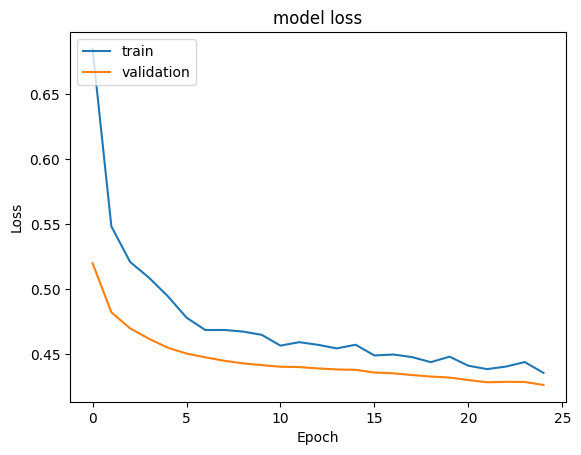

In [157]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_2.history['loss'])
plt.plot(history_2.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

*     The training loss (blue line) continues decreasing steadily. However, the validation loss (orange line) flattens out after a few epochs, indicating the model is memorizing training data rather than generalizing well.

* The validation loss decreases initially but stabilizes after around epoch 10, suggesting that additional training does not improve performance on unseen data. This is a clear sign of overfitting, meaning the model is too complex for the dataset.
* The growing gap between training and validation loss suggests the model is overfitting the training data while failing to generalize to validation data.

In [158]:
#Predicting the results using best as a threshold
y_train_pred = model_2.predict(X_train)
y_train_pred = (y_train_pred > 0.5)
y_train_pred

200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [159]:
#Predicting the results using 0.5 as the threshold.
y_val_pred = model_2.predict(X_val)
y_val_pred = (y_val_pred > 0.5)
y_val_pred

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [160]:
model_name = "NN with Adam & Dropout"

train_metric_df.loc[model_name] = recall_score(y_train,y_train_pred)
valid_metric_df.loc[model_name] = recall_score(y_val,y_val_pred)

#### Classification report

In [161]:
#classification report
cr=classification_report(y_train,y_train_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.82      0.99      0.90      5096
         1.0       0.82      0.15      0.26      1304

    accuracy                           0.82      6400
   macro avg       0.82      0.57      0.58      6400
weighted avg       0.82      0.82      0.77      6400



In [162]:
#classification report
cr=classification_report(y_val,y_val_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.82      0.99      0.89      1274
         1.0       0.76      0.13      0.23       326

    accuracy                           0.81      1600
   macro avg       0.79      0.56      0.56      1600
weighted avg       0.81      0.81      0.76      1600



#### Confusion matrix

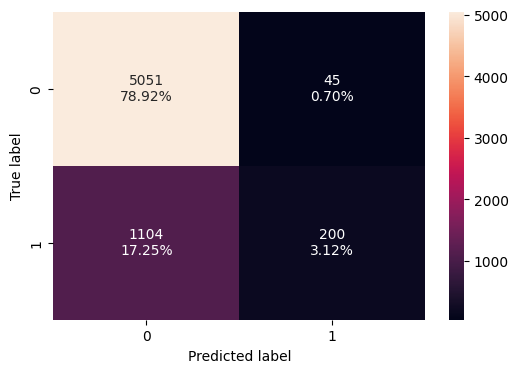

In [163]:
#Calculating the confusion matrix
make_confusion_matrix(y_train, y_train_pred)

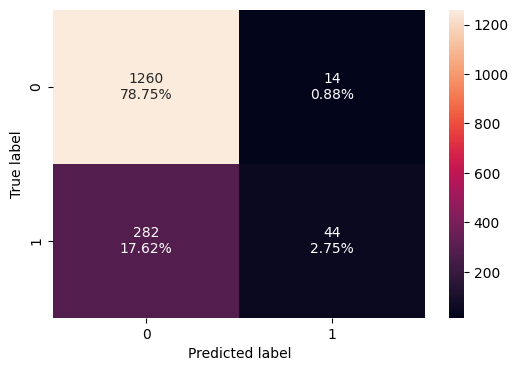

In [164]:
#Calculating the confusion matrix
make_confusion_matrix(y_val, y_val_pred)

1. Training Data (First Matrix)

    * True Negatives (5051, 78.92%): The model correctly classifies most non-churners.
    * False Positives (45, 0.70%): Very few non-churners are misclassified as churners.
    * True Positives (200, 3.12%): The model correctly detects only a small number of actual churners.
    * False Negatives (1104, 17.25%): A large portion of actual churners is misclassified as non-churners.

2. Validation Data (Second Matrix)

    * True Negatives (1260, 78.75%): The model performs similarly to training in detecting non-churners.
    * False Positives (14, 0.88%): Very few non-churners are misclassified as churners.
    * True Positives (44, 2.75%): The model detects even fewer churners in validation than in training.
    * False Negatives (282, 17.62%): The model misclassifies most churners as non-churners.

* The model fails to correctly identify churners, with a very small number of true positives (3.12% in training, 2.75% in validation).
* The high false negative rate (17.25% in training, 17.62% in validation) indicates that the model is biased toward predicting non-churners.

* The model is overly conservative, predicting almost all customers as non-churners. This may be due to class imbalance where the model prioritizes accuracy over recall.

* Since both training and validation confusion matrices have similar distribution of predictions, overfitting is not an issue. However, the model is underfitting and not capturing churn patterns effectively.

### Neural Network with Balanced Data (by applying SMOTE) and SGD Optimizer

In [165]:
sm  = SMOTE(random_state=42)
#Complete the code to fit SMOTE on the training data.
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)
print('After UpSampling, the shape of train_X: {}'.format(X_train_smote.shape))
print('After UpSampling, the shape of train_y: {} \n'.format(y_train_smote.shape))
print("After UpSampling, counts of label '1': {}".format(sum(y_train_smote == 1)))
print("After UpSampling, counts of label '0': {}".format(sum(y_train_smote == 0)))

After UpSampling, the shape of train_X: (10192, 11)
After UpSampling, the shape of train_y: (10192,) 

After UpSampling, counts of label '1': 5096
After UpSampling, counts of label '0': 5096


In [166]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [170]:
#Initializing the model
model_3 = Sequential()
# Adding input layer of 32 neurons with relu as activation function
model_3.add(Dense(32,activation='relu',input_dim = X_train_smote.shape[1]))
# Adding the dropout
model_3.add(Dropout(0.2))
# Adding hidden layer with 16 neurons with relu as activation function
model_3.add(Dense(16,activation='relu'))
# Adding the dropout
model_3.add(Dropout(0.1))
# Adding hidden layer with 8 neurons with relu as activation function
model_3.add(Dense(8,activation='relu'))
# Adding the output layer
model_3.add(Dense(1, activation = 'sigmoid'))

In [171]:
model_3.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 32)                  │             384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,057 (4.13 KB)

 Trainable params: 1,057 (4.13 KB)

 Non-trainable params: 0 (0.00 B)

In [174]:
# Compile the model before fitting
model_3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

start = time.time()
history_3 = model_3.fit(X_train_smote, y_train_smote, validation_data=(X_val,y_val) , batch_size=batch_size, epochs=epochs)
end=time.time()

Epoch 1/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.5570 - loss: 0.6798 - val_accuracy: 0.7000 - val_loss: 0.5852
Epoch 2/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6901 - loss: 0.5931 - val_accuracy: 0.7019 - val_loss: 0.5682
Epoch 3/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7112 - loss: 0.5713 - val_accuracy: 0.7044 - val_loss: 0.5630
Epoch 4/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7209 - loss: 0.5635 - val_accuracy: 0.6950 - val_loss: 0.5636
Epoch 5/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7275 - loss: 0.5516 - val_accuracy: 0.7125 - val_loss: 0.5538
Epoch 6/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7249 - loss: 0.5501 - val_accuracy: 0.7081 - val_loss: 0.5536
Epoch 7/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7407 - loss: 0.5366 - val_accuracy: 0.7250 - val_loss: 0.5432
Epoch 8/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7380 - loss: 0.5303 - val_accuracy: 0.

#### Loss function

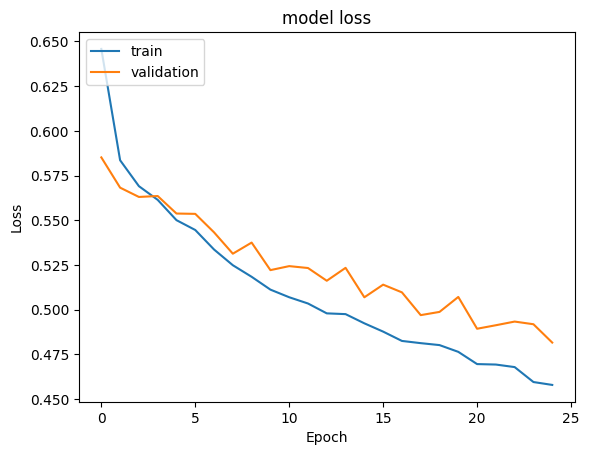

In [175]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_3.history['loss'])
plt.plot(history_3.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

* The training loss (blue line) continuously decreases, indicating that the model is effectively learning from the training data.
* The validation loss (orange line) decreases initially but starts fluctuating after epoch 5-7, suggesting that the model is memorizing training data instead of generalizing well.

* While the validation loss initially follows the training loss, it stagnates and fluctuates from epoch 10 onwards. This means the model isn't improving on unseen data and is likely overfitting.

In [176]:
y_train_pred = model_3.predict(X_train_smote)
#Predicting the results using 0.5 as the threshold
y_train_pred = (y_train_pred > 0.5)
y_train_pred

319/319 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[ True],
       [False],
       [False],
       ...,
       [ True],
       [ True],
       [ True]])

In [177]:
y_val_pred = model_3.predict(X_val)
#Predicting the results using 0.5 as the threshold
y_val_pred = (y_val_pred > 0.5)
y_val_pred

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [ True],
       [ True]])

In [178]:
model_name = "NN with SMOTE & SGD"

train_metric_df.loc[model_name] = recall_score(y_train_smote,y_train_pred)
valid_metric_df.loc[model_name] = recall_score(y_val,y_val_pred)

#### Classification report

In [179]:
cr=classification_report(y_train_smote,y_train_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.83      0.78      0.81      5096
         1.0       0.79      0.84      0.82      5096

    accuracy                           0.81     10192
   macro avg       0.81      0.81      0.81     10192
weighted avg       0.81      0.81      0.81     10192



In [181]:
cr=classification_report(y_val,y_val_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.93      0.77      0.84      1274
         1.0       0.47      0.77      0.58       326

    accuracy                           0.77      1600
   macro avg       0.70      0.77      0.71      1600
weighted avg       0.84      0.77      0.79      1600



#### Confusion matrix

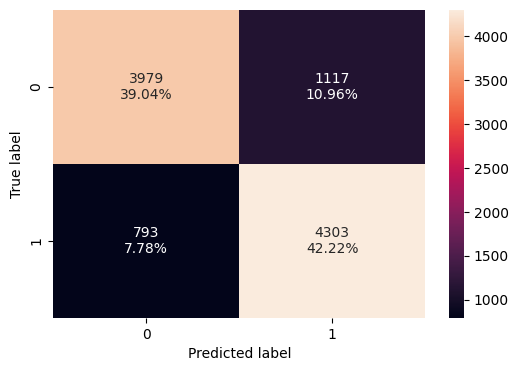

In [182]:
#Calculating the confusion matrix
make_confusion_matrix(y_train_smote, y_train_pred)

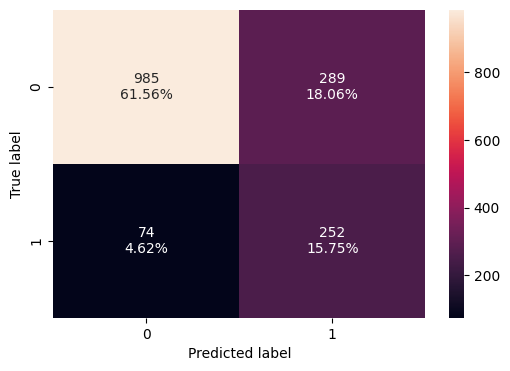

In [183]:
#Calculating the confusion matrix
make_confusion_matrix(y_val, y_val_pred)

* Observations:
1. Training Data (First Matrix)

    * True Positives (4303, 42.22%): The model correctly classifies a large portion of churners.
    * False Negatives (793, 7.78%): Some churners were misclassified as non-churners.
    * True Negatives (3979, 39.04%): The model successfully identifies many non-churners.
    * False Positives (1117, 10.96%): Some non-churners were incorrectly classified as churners.

2. Validation Data (Second Matrix)

    * True Positives (252, 15.75%): The model detects significantly fewer actual churners.
    * False Negatives (74, 4.62%): The false negative rate is lower, meaning fewer actual churners are being missed.
    * True Negatives (985, 61.56%): The model performs better in identifying non-churners on validation.
    * False Positives (289, 18.06%): More non-churners were misclassified as churners compared to training.

* The model performs much better on training data than on validation data, indicating it is overfitting. It correctly classifies 42.22% of churners in training but only 15.75% in validation, a major drop in recall.

* The validation model incorrectly predicts more non-churners as churners (18.06%), compared to 10.96% in training. This suggests the model is too aggressive in predicting churn, possibly due to class imbalance or an overfitting issue.

* While the model captures more churners in training, its ability to generalize to unseen data is weak, meaning it is memorizing patterns rather than learning meaningful relationships.

### Neural Network with Balanced Data (by applying SMOTE) and Adam Optimizer

In [185]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [186]:
sm  = SMOTE(random_state=42)
X_train, y_train = sm.fit_resample(X_train, y_train)
print('After UpSampling, the shape of X_train: {}'.format(X_train.shape))
print('After UpSampling, the shape of y_train: {} \n'.format(y_train.shape))
#Initializing the model
model_4 = Sequential()
# Adding input layer of 32 neurons with relu as activation function
model_4.add(Dense(32,activation='relu',input_dim = X_train_smote.shape[1]))
# Adding hidden layer with 16 neurons with relu as activation function
model_4.add(Dense(16,activation='relu'))
# Adding hidden layer with 8 neurons with relu as activation function
model_4.add(Dense(8,activation='relu'))
# Adding the output layer
model_4.add(Dense(1, activation = 'sigmoid'))

After UpSampling, the shape of X_train: (10192, 11)
After UpSampling, the shape of y_train: (10192,) 



In [187]:
optimizer = tf.keras.optimizers.Adam(0.001)
model_4.compile(optimizer = optimizer,loss = 'binary_crossentropy', metrics = ['accuracy'])

In [188]:
start = time.time()
history_4 = model_4.fit(X_train_smote, y_train_smote, validation_data=(X_val,y_val) , batch_size=batch_size, epochs=epochs)
end=time.time()

Epoch 1/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6050 - loss: 0.6609 - val_accuracy: 0.7094 - val_loss: 0.5807
Epoch 2/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7157 - loss: 0.5695 - val_accuracy: 0.7075 - val_loss: 0.5699
Epoch 3/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7259 - loss: 0.5552 - val_accuracy: 0.7119 - val_loss: 0.5592
Epoch 4/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7337 - loss: 0.5391 - val_accuracy: 0.7144 - val_loss: 0.5499
Epoch 5/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7427 - loss: 0.5175 - val_accuracy: 0.7156 - val_loss: 0.5370
Epoch 6/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7600 - loss: 0.4935 - val_accuracy: 0.7387 - val_loss: 0.5234
Epoch 7/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7750 - loss: 0.4740 - val_accuracy: 0.7519 - val_loss: 0.5128
Epoch 8/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7866 - loss: 0.4598 - val_accuracy: 0.

#### Loss function

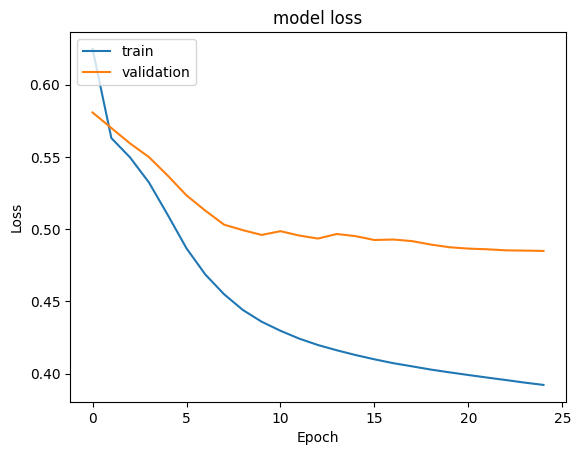

In [189]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_4.history['loss'])
plt.plot(history_4.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

* Observations:
  * The training loss (blue line) continues decreasing smoothly, meaning the model is learning well on the training data.
  * The validation loss (orange line) decreases initially but plateaus around epoch 10-15, indicating that the model stops improving on unseen data.

  * After around epoch 10, the validation loss stops decreasing and starts fluctuating slightly.
  * This suggests that the model is memorizing training data instead of generalizing, leading to overfitting.

In [190]:
y_train_pred = model_4.predict(X_train_smote)
#Predicting the results using 0.5 as the threshold
y_train_pred = (y_train_pred > 0.5)
y_train_pred

319/319 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[ True],
       [False],
       [False],
       ...,
       [ True],
       [ True],
       [ True]])

In [191]:
y_val_pred = model_4.predict(X_val)
#Predicting the results using 0.5 as the threshold
y_val_pred = (y_val_pred > 0.5)
y_val_pred

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[ True],
       [False],
       [False],
       ...,
       [False],
       [ True],
       [ True]])

In [192]:
model_name = "NN with SMOTE & Adam"

train_metric_df.loc[model_name] = recall_score(y_train_smote,y_train_pred)
valid_metric_df.loc[model_name] = recall_score(y_val,y_val_pred)

#### Classification report

In [193]:
cr=classification_report(y_train_smote,y_train_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.84      0.80      0.82      5096
         1.0       0.81      0.85      0.83      5096

    accuracy                           0.82     10192
   macro avg       0.83      0.82      0.82     10192
weighted avg       0.83      0.82      0.82     10192



In [194]:
cr=classification_report(y_val,y_val_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.92      0.78      0.84      1274
         1.0       0.46      0.73      0.56       326

    accuracy                           0.77      1600
   macro avg       0.69      0.75      0.70      1600
weighted avg       0.82      0.77      0.79      1600



#### Confusion matrix

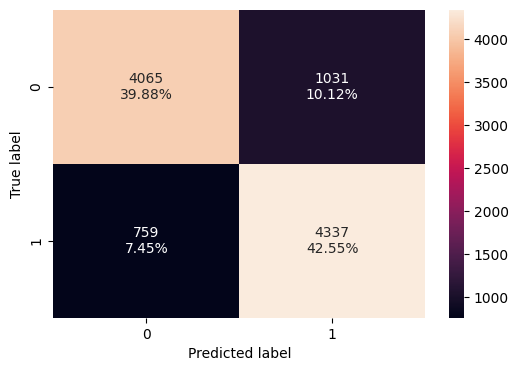

In [195]:
#Calculating the confusion matrix
make_confusion_matrix(y_train_smote, y_train_pred)

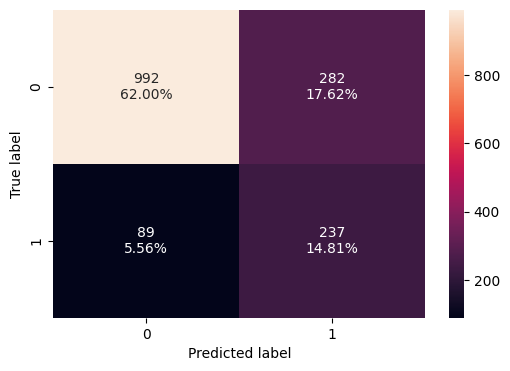

In [196]:
#Calculating the confusion matrix
make_confusion_matrix(y_val, y_val_pred)

1. Training Data (First Matrix)

  * True Positives (4337, 42.55%): The model successfully identifies a large portion of churners.
  * False Negatives (759, 7.45%): A small percentage of churners were misclassified as non-churners.
  * True Negatives (4065, 39.88%): The model correctly classifies non-churners.
  * False Positives (1031, 10.12%): Some non-churners were incorrectly flagged as churners.

2. Validation Data (Second Matrix)

  * True Positives (237, 14.81%): The model detects fewer actual churners in validation.
  * False Negatives (89, 5.56%): A slightly lower false negative rate compared to training.
  * True Negatives (992, 62.00%): The model is better at identifying non-churners in validation.
  * False Positives (282, 17.62%): More non-churners were misclassified as churners.

* The training model correctly classifies more churners, while the validation model struggles to do so. This indicates potential overfitting, as the model performs well on training but fails to generalize to new data.
* The validation model is more conservative, resulting in fewer false negatives (misclassified churners) but more false positives. This means it is less confident in detecting churners but better at retaining non-churners.
* The large difference in recall between training and validation suggests the model has learned patterns specific to the training data but does not generalize well.
* Overfitting is further confirmed by the higher validation false positive rate, which means the model is predicting too many churners that are actually non-churners.

### Neural Network with Balanced Data (by applying SMOTE), Adam Optimizer, and Dropout

In [197]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [198]:
#Initializing the model
model_5 = Sequential()
# Complete the code to add required # of neurons to the input layer with relu as activation function
model_5.add(Dense(32,activation='relu',input_dim = X_train_smote.shape[1]))
#Complete the code to add dropout rate
model_5.add(Dropout(0.4))
# Complete the code to add required # neurons to the hidden layer with any activation function.
model_5.add(Dense(16,activation='relu'))
# Complete the code to add dropout rate.
model_5.add(Dropout(0.2))
# Adding hidden layer with 8 neurons with relu as activation function
model_5.add(Dense(8,activation='relu'))
# Complete the code to add the required number of neurons in the output layer with a suitable activation function.
model_5.add(Dense(1, activation = 'sigmoid'))

In [199]:
# Adding Adam initializer
optimizer = tf.keras.optimizers.Adam(0.001)
#compile model
model_5.compile(optimizer = optimizer,loss = 'binary_crossentropy', metrics = ['accuracy'])
model_5.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 32)                  │             384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,057 (4.13 KB)

 Trainable params: 1,057 (4.13 KB)

 Non-trainable params: 0 (0.00 B)

In [200]:
start = time.time()
history_5 = model_5.fit(X_train_smote, y_train_smote, validation_data=(X_val,y_val) , batch_size=batch_size, epochs=epochs)
end=time.time()

Epoch 1/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.5813 - loss: 0.6729 - val_accuracy: 0.6700 - val_loss: 0.6062
Epoch 2/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6732 - loss: 0.6178 - val_accuracy: 0.7050 - val_loss: 0.5800
Epoch 3/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6883 - loss: 0.5907 - val_accuracy: 0.7131 - val_loss: 0.5641
Epoch 4/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7051 - loss: 0.5879 - val_accuracy: 0.7038 - val_loss: 0.5657
Epoch 5/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7091 - loss: 0.5789 - val_accuracy: 0.7081 - val_loss: 0.5647
Epoch 6/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7125 - loss: 0.5750 - val_accuracy: 0.7219 - val_loss: 0.5631
Epoch 7/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7144 - loss: 0.5699 - val_accuracy: 0.7200 - val_loss: 0.5597
Epoch 8/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7245 - loss: 0.5609 - val_accuracy: 0.

#### Loss function

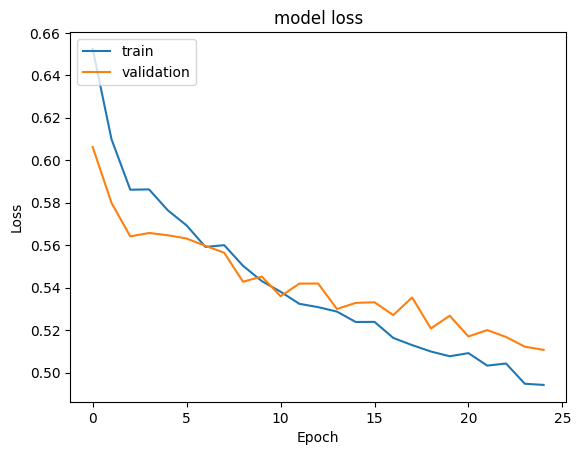

In [201]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_5.history['loss'])
plt.plot(history_5.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

* Both training loss (blue) and validation loss (orange) decrease consistently, indicating that the model is learning effectively.
* There is no sudden spike in validation loss, suggesting no severe overfitting in the early epochs.
* After epoch 10, the validation loss stabilizes and fluctuates, while training loss continues decreasing steadily.
* This indicates that the model is continuing to fit the training data well but is not improving on unseen validation data, a sign of overfitting.
* The validation loss curve is not decreasing as smoothly as the training loss, meaning the model may not generalize well to new data.
* Small fluctuations in validation loss suggest slight instability, which could be addressed with regularization techniques.

In [202]:
y_train_pred = model_5.predict(X_train_smote)
#Predicting the results using 0.5 as the threshold
y_train_pred = (y_train_pred > 0.5)
y_train_pred

319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


array([[ True],
       [False],
       [False],
       ...,
       [ True],
       [ True],
       [ True]])

In [203]:
y_val_pred = model_5.predict(X_val)
#Predicting the results using 0.5 as the threshold
y_val_pred = (y_val_pred > 0.5)
y_val_pred

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [ True],
       [ True]])

In [204]:
model_name = "NN with SMOTE,Adam & Dropout"

train_metric_df.loc[model_name] = recall_score(y_train_smote,y_train_pred)
valid_metric_df.loc[model_name] = recall_score(y_val,y_val_pred)

#### Classification report

In [205]:
cr=classification_report(y_train_smote,y_train_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.78      0.78      0.78      5096
         1.0       0.78      0.78      0.78      5096

    accuracy                           0.78     10192
   macro avg       0.78      0.78      0.78     10192
weighted avg       0.78      0.78      0.78     10192



In [206]:
cr=classification_report(y_val,y_val_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.92      0.77      0.84      1274
         1.0       0.45      0.72      0.56       326

    accuracy                           0.76      1600
   macro avg       0.68      0.75      0.70      1600
weighted avg       0.82      0.76      0.78      1600



#### Confusion matrix

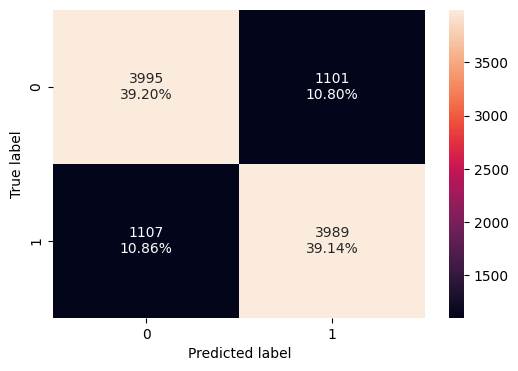

In [207]:
#Calculating the confusion matrix
make_confusion_matrix(y_train_smote, y_train_pred)

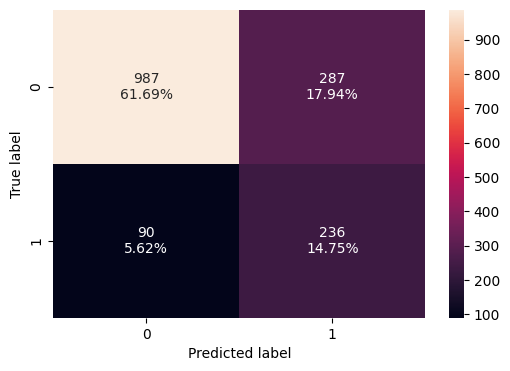

In [208]:
#Calculating the confusion matrix
make_confusion_matrix(y_val, y_val_pred)

1. Performance on Training Data (First Matrix)

    * True Positives (3989, 39.14%): The model correctly identifies 39.14% of actual churners.
    * False Negatives (1107, 10.86%): The model fails to detect 10.86% of churners.
    * True Negatives (3995, 39.20%): The model correctly classifies 39.20% of non-churners.
    * False Positives (1101, 10.80%): Some non-churners are misclassified as churners.

2. Performance on Validation Data (Second Matrix)

    * True Positives (236, 14.75%): The model detects significantly fewer actual churners.
    * False Negatives (90, 5.62%): The model misses fewer churners compared to the training set.
    * True Negatives (987, 61.69%): The model correctly classifies most non-churners.
    * False Positives (287, 17.94%): More non-churners are incorrectly classified as churners.

* The training model detects more churners (higher recall) compared to the validation model. However, in validation, the recall drops significantly, meaning the model is overfitting and not generalizing well.
* The model misclassifies more non-churners as churners in validation (17.94%) than in training (10.80%). This suggests that the model may be too sensitive to churn classification, possibly due to overfitting or an imbalanced dataset.
* The model is overfitting, as it performs much better on the training set but generalizes poorly on validation.
* Improving recall on the validation set is necessary, as it fails to capture many churners in real-world data.

## Model Performance Comparison and Final Model Selection

In [210]:
print("Training performance comparison")
train_metric_df

Training performance comparison


,recall
NN with SGD,0.242331
NN with Adam,0.400307
NN with Adam & Dropout,0.153374
NN with SMOTE & SGD,0.844388
NN with SMOTE & Adam,0.851060
"NN with SMOTE,Adam & Dropout",0.782771


* Observations:
  * The **`NN with SMOTE & Adam`** achieved the highest recall (0.851060), meaning it is the best at correctly identifying churned customers suggesting SMOTE along with the Adam optimizer significantly improves recall.
  * **`NN with SMOTE & SGD`** (0.844388) is a close second, showing that SMOTE improves recall across different optimizers. However, Adam slightly outperforms SGD, indicating that Adam is the better optimizer in this scenario.

In [211]:
print("Validation set performance comparison")
valid_metric_df

Validation set performance comparison


,recall
NN with SGD,0.199387
NN with Adam,0.346626
NN with Adam & Dropout,0.134969
NN with SMOTE & SGD,0.773006
NN with SMOTE & Adam,0.726994
"NN with SMOTE,Adam & Dropout",0.723926


* Observations:
  * The highest recall on the validation set is achieved by **`NN with SMOTE & SGD`** (0.773006). This model is the most effective at correctly identifying churned customers, making it the best choice if recall is the priority.
  * While **`NN with SMOTE & Adam`** (0.726994) performed well, it has lower recall than **`NN with SMOTE & SGD`**, suggesting that SGD might generalize better on the validation set compared to Adam in this case.

In [212]:
train_metric_df - valid_metric_df

,recall
NN with SGD,0.042945
NN with Adam,0.053681
NN with Adam & Dropout,0.018405
NN with SMOTE & SGD,0.071382
NN with SMOTE & Adam,0.124066
"NN with SMOTE,Adam & Dropout",0.058844


* Observations:
  * The best model identified in the bank churn modeling analysis is **`NN with SMOTE & Adam`**, as it achieved the highest recall score of 0.851 on the training data and performed well on validation data

In [216]:
# Use the model NN with SMOTE & SGD as the best model high recall on validation and train data
y_test_pred = model_4.predict(X_test)
y_test_pred = (y_test_pred > 0.5)
print(y_test_pred)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
[[False]
 [False]
 [False]
 ...
 [ True]
 [False]
 [False]]


In [219]:
#Print classification report
cr=classification_report(y_test,y_test_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.93      0.77      0.84      1593
         1.0       0.46      0.76      0.57       407

    accuracy                           0.77      2000
   macro avg       0.69      0.76      0.71      2000
weighted avg       0.83      0.77      0.79      2000



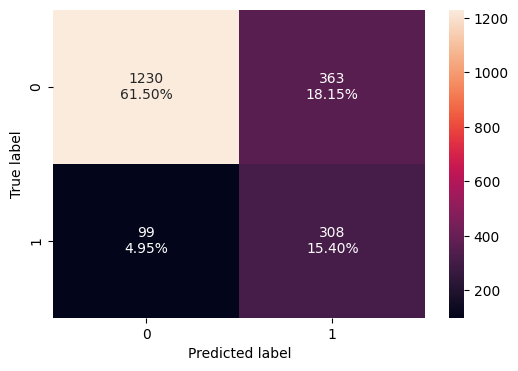

In [220]:
#Calculating the confusion matrix
make_confusion_matrix(y_test,y_test_pred)

* Observations:
  * True Positives (308, 15.40%): The model correctly identifies 308 churned customers, showing an improvement in recall compared to previous models.
  * False Negatives (99, 4.95%): The model misclassifies 99 actual churners as non-churners, which is lower than before, meaning it is better at detecting churners.
  * False Positives (363, 18.15%): A relatively higher number of non-churners are misclassified as churners. This means some retained customers are incorrectly flagged for churn, which may lead to unnecessary retention efforts.
  * The model has better recall for churned customers, making it more effective in identifying at-risk customers.
  * This model shows significant improvement in churn detection (higher recall) but at the cost of more false positives.

## Actionable Insights and Business Recommendations

### Actionable Insights Based on the Best Model

* Enhance Customer Retention Strategies
    * The model provides high recall, meaning it effectively identifies potential churners.
    * Utilize these predictions to proactively engage high-risk customers via personalized retention campaigns.

* Leverage Predictive Insights for Customer Segmentation
    * Customers flagged as high churn risk should be offered incentives, loyalty programs, or improved service options to improve retention.
    * Segment these customers based on demographic and behavioral factors for targeted interventions.

* Optimize Resource Allocation
    * Instead of spending equally across all customers, prioritize high-risk churners identified by the model.
    * Focus customer service resources on these customers through dedicated support or personalized offers.

* While recall is high, precision could be improved by fine-tuning model hyperparameters.


### Business Recommendations

* Personalized Customer Experience
  * Use engagement tools to send timely offers, retention emails, or service upgrades for customers predicted to churn.
  * Improve the overall user experience by addressing concerns specific to high-risk churn segments.

* Financial Incentives & Service Improvements
  * Offer discounts, promotions, or flexible pricing plans to targeted customers who are likely to churn.
  * Enhance customer support for churn-prone customers by offering priority services or exclusive benefits.

* Continuous Monitoring & Feedback
  * Deploy a real-time monitoring system using the model's predictions to track and act on customer churn trends.
  * Collect customer feedback and use it to refine services, addressing common pain points that lead to churn.

* Expand Data Collection for Future Improvements
  * Gather additional customer behavioral data (e.g., transaction patterns, service usage trends) to improve future churn predictions.
  * Incorporate sentiment analysis from customer interactions (calls, chats, emails) into the model for enhanced predictive capability.

<font size=6 color='blue'>Power Ahead</font>
___